In this notebook I will implement the well-known analysis using a $\frac{dN}{dz}(z)$ distribution. It is assumed that the distribution is known to the user. 

The z array is  [1.00000000e-03 2.62424242e-02 5.14848485e-02 7.67272727e-02
 1.01969697e-01 1.27212121e-01 1.52454545e-01 1.77696970e-01
 2.02939394e-01 2.28181818e-01 2.53424242e-01 2.78666667e-01
 3.03909091e-01 3.29151515e-01 3.54393939e-01 3.79636364e-01
 4.04878788e-01 4.30121212e-01 4.55363636e-01 4.80606061e-01
 5.05848485e-01 5.31090909e-01 5.56333333e-01 5.81575758e-01
 6.06818182e-01 6.32060606e-01 6.57303030e-01 6.82545455e-01
 7.07787879e-01 7.33030303e-01 7.58272727e-01 7.83515152e-01
 8.08757576e-01 8.34000000e-01 8.59242424e-01 8.84484848e-01
 9.09727273e-01 9.34969697e-01 9.60212121e-01 9.85454545e-01
 1.01069697e+00 1.03593939e+00 1.06118182e+00 1.08642424e+00
 1.11166667e+00 1.13690909e+00 1.16215152e+00 1.18739394e+00
 1.21263636e+00 1.23787879e+00 1.26312121e+00 1.28836364e+00
 1.31360606e+00 1.33884848e+00 1.36409091e+00 1.38933333e+00
 1.41457576e+00 1.43981818e+00 1.46506061e+00 1.49030303e+00
 1.51554545e+00 1.54078788e+00 1.56603030e+00 1.59127273e+00
 1.61651

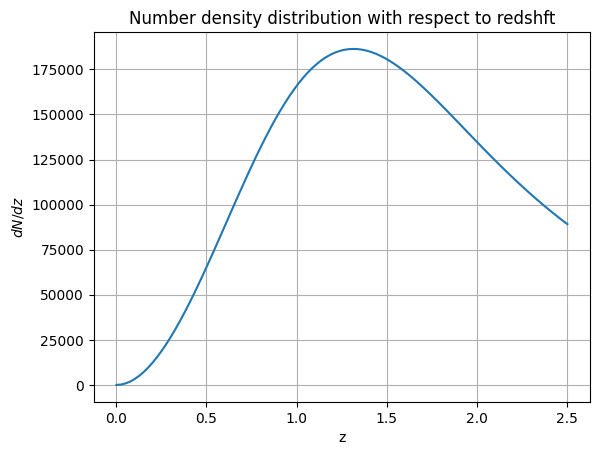

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
#Here the file path should be chnaged to  correspond to the users requirments
data = np.load("/home/kostis/Desktop/Master_Thesis_ubuntu/loren/z_dNdz_low_zmax.npy")
size = np.shape(data)

z_array = data[0]
dNdz_gw = 10*data[1]
print("The z array is ",z_array)
print("The dNdz array is ",dNdz_gw)


plt.plot(z_array,dNdz_gw)
plt.grid()
plt.title('Number density distribution with respect to redshft')
plt.xlabel('z')
plt.ylabel('$dN/dz$')



ln_z_array = np.log(z_array)
ln_dNdz_gw = np.log(dNdz_gw)

The transformation of the of the distributio from redshift to luminosity distance.

[4.454438226136908, 119.1245271761215, 238.00132202612315, 360.965131101498, 487.8975751886991, 618.6818493311819, 753.2029588135673, 891.3479291266323, 1033.0059900963345, 1178.0687347021387, 1326.4302534013498, 1477.9872450166922, 1632.6391054354317, 1790.2879955124654, 1950.8388896706024, 2114.1996067529067, 2280.280824709124, 2448.9960806955937, 2620.261758140422, 2793.997062277649, 2970.1239855899394, 3148.5672645229097, 3329.254328749045, 3512.115244168414, 3697.08265073957, 3884.0916961394823, 4073.079966157764, 4263.987412639427, 4456.75627970286, 4651.331028876721, 4847.658263721348, 5045.6866544275745, 5245.366862818781, 5446.651468120383, 5649.4948938050475, 5853.853335771244, 6059.684692067273, 6266.948494332394, 6475.605841090511, 6685.619333000271, 6896.953010137471, 7109.57229136146, 7323.443915796237, 7538.535886438958, 7754.81741589306, 7972.258874210461, 8190.831738816144, 8410.508546479714, 8631.262847290947, 8853.069160590638, 9075.902932803318, 9299.740497115014, 9

Text(0, 0.5, '$dN/dz$')

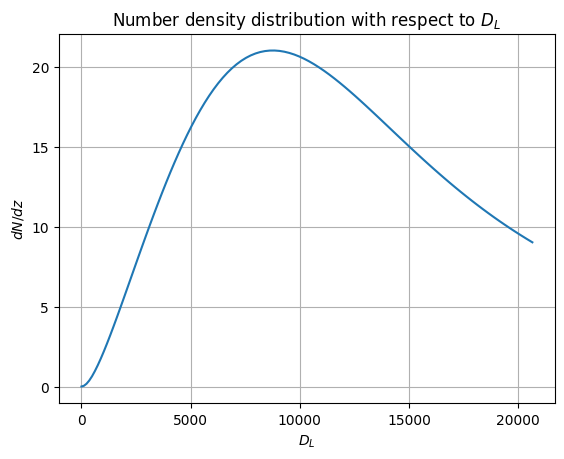

In [2]:
# max_z = np.max(z_array)
# max_dndz_gw = np.max(dNdz_gw)

# we will now drive the same plots in D_L space, we use the 2018 Plack values for Omega_matter, H_0 
Omega_matter = 0.315
#The followign result is in Mpc^(-1)
c_over_H0 = 4451.04
from scipy.integrate import quad
#firstly we need to calculate the integral in the the D_L formula, so we define the the integrand
def integrand(z):
    return 1/np.sqrt(Omega_matter*(1+z)**3+(1-Omega_matter))


dnDL_gw = []
DL_gw = []

for i in range(len(z_array)-1):
    integration = quad(integrand,0,z_array[i])
    DL_gw.append(integration[0]*(1+z_array[i])*c_over_H0)

print(DL_gw)

for i in range(len(z_array)-1):
    cnt = dNdz_gw[i] / (DL_gw[i]/(1+z_array[i]) + c_over_H0*(1+z_array[i]) / np.sqrt(Omega_matter*(1+z_array[i])**3+(1-Omega_matter)) )
                      
                      
    dnDL_gw.append(cnt)
print(dnDL_gw)

plt.plot(DL_gw,dnDL_gw)
plt.grid()
plt.title('Number density distribution with respect to $D_L$')
plt.xlabel('$D_L$')
plt.ylabel('$dN/dz$')

Text(0, 0.5, '$dN/dD_L$')

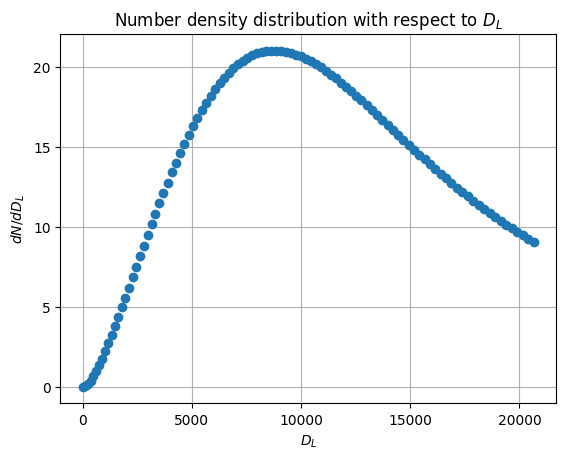

In [3]:
plt.plot(DL_gw,dnDL_gw,'o')
plt.grid()
plt.title('Number density distribution with respect to $D_L$')
plt.xlabel('$D_L$')
plt.ylabel('$dN/dD_L$')

[-9.54613419 -3.0531866  -1.74483163 -0.98342212 -0.44790148 -0.0376002
  0.28931515  0.5607366   0.79224264  0.99333038  1.17048689  1.32828742
  1.47015257  1.598677    1.7158437   1.82319903  1.92193756  2.01316756
  2.09768776  2.1761152   2.24914955  2.31712775  2.38059832  2.43981506
  2.49516253  2.5467906   2.5950728   2.6400259   2.68198167  2.72103337
  2.75729122  2.79096449  2.82210654  2.85080479  2.87721675  2.90141978
  2.92344179  2.9434001   2.96138264  2.97745074  2.99167018  3.00407044
  3.01474036  3.02374594  3.03115131  3.03700092  3.04134621  3.04424083
  3.04573328  3.04587365  3.04471045  3.04229179  3.03866545  3.03387739
  3.02797228  3.0209939   3.01298513  3.00399021  2.99405102  2.98320715
  2.97149804  2.95896356  2.94565034  2.93159145  2.91682088  2.90137414
  2.88528366  2.86858394  2.85130726  2.83352621  2.81523916  2.79647345
  2.77725524  2.75761208  2.73757053  2.71720652  2.6965192   2.67551343
  2.65421166  2.63264084  2.6108882   2.58893083  2.

Text(0, 0.5, '$\\ln dN/dD_L$')

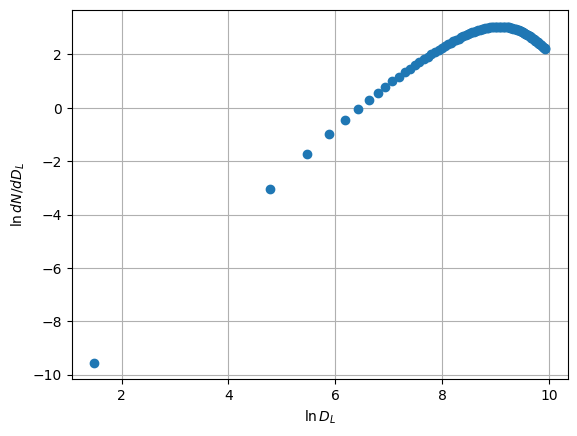

In [4]:
#Logarithmic scale
ln_dnDL_gw = np.log(dnDL_gw)
ln_DL_gw =np.log(DL_gw)

print(ln_dnDL_gw)
print(ln_DL_gw)

plt.plot(ln_DL_gw,ln_dnDL_gw,'o')
plt.grid()
plt.xlabel('$\ln D_L$')
plt.ylabel('$\ln dN/dD_L$')
# plt.plot(DL_gw,dnDL_gw)

User needs to set up his own estimates for the parameters that are fitted.

Text(0, 0.5, '$\\ln dN/dD_L$')

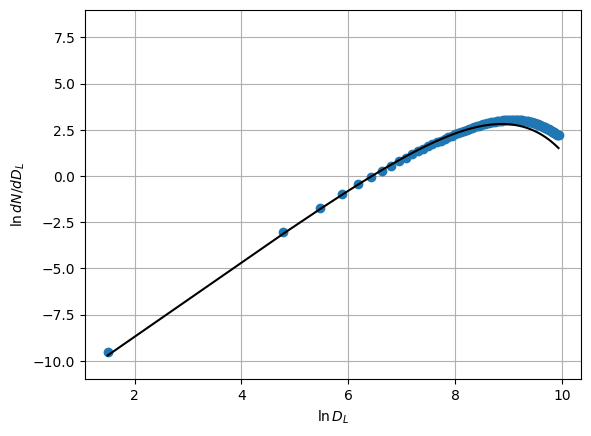

In [5]:
def ln_fit(x, a, b, c, d):
    return np.log(a) + b*x - c*np.exp(d*x)

estimate = []

plt.plot(ln_DL_gw, ln_dnDL_gw, 'o')
plt.plot(ln_DL_gw, ln_fit(ln_DL_gw, *estimate), 'k')
plt.grid()
plt.ylim(-11., 9.)
plt.xlabel('$\ln D_L$')
plt.ylabel('$\ln dN/dD_L$')

Text(0, 0.5, '$\\ln dN/dD_L$')

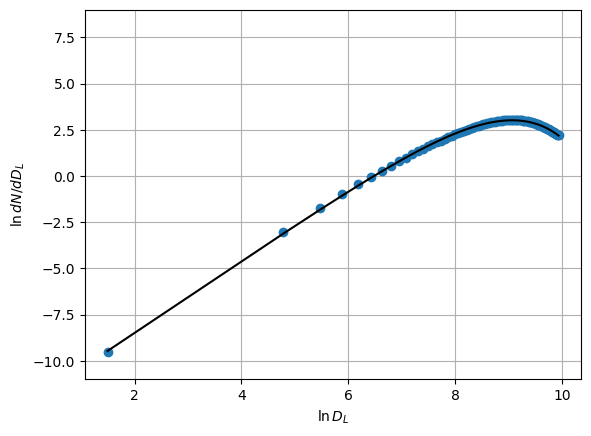

In [6]:
fitting_params, cov_matrix_bhns = scipy.optimize.curve_fit(ln_fit, ln_DL_gw, ln_dnDL_gw, p0 = estimate, maxfev = 10000)
y_output_bhns =  ln_fit(np.array(ln_DL_gw), *fitting_params)


plt.plot(ln_DL_gw, ln_dnDL_gw, 'o')
plt.plot(ln_DL_gw, ln_fit(ln_DL_gw, *fitting_params), 'k')
plt.grid()
plt.ylim(-11., 9.)
plt.xlabel('$\ln D_L$')
plt.ylabel('$\ln dN/dD_L$')

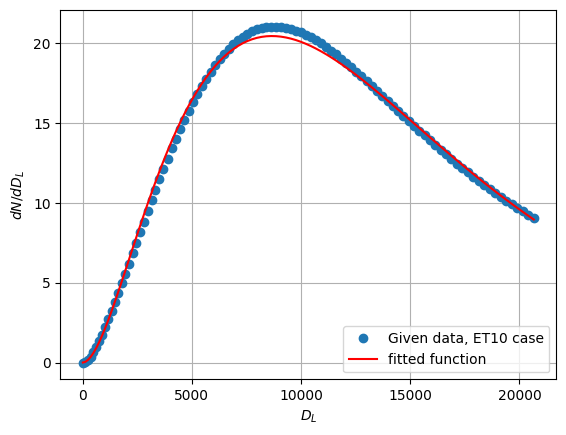

In [18]:
plt.plot(DL_gw, dnDL_gw, 'o', label = 'Given data, ET10 case')
plt.plot(DL_gw, np.exp(ln_fit(ln_DL_gw, *fitting_params)),label='fitted function' , color = 'red')
plt.grid()
plt.xlabel('$D_L$')
plt.ylabel('$dN/dD_L$')
plt.legend()


Text(0, 0.5, '$(dN/dD_{L,fit}-dN/dD_{L,real})/dN/dD_{L,real}$')

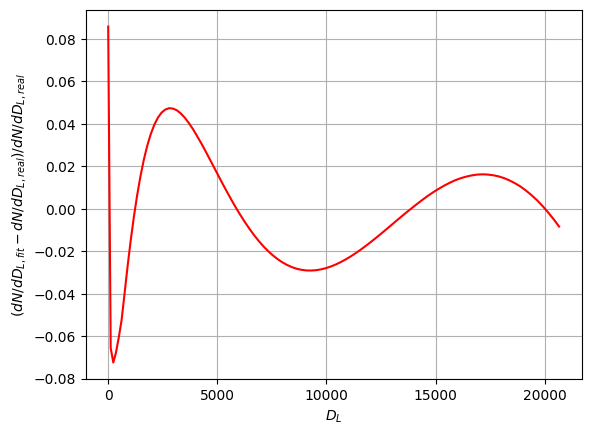

In [8]:
plt.plot(DL_gw, (np.exp(ln_fit(ln_DL_gw, *fitting_params))-dnDL_gw)/dnDL_gw , color = 'red')
plt.grid()
plt.xlabel('$D_L$')
plt.ylabel('$(dN/dD_{L,fit}-dN/dD_{L,real})/dN/dD_{L,real}$')

In [9]:
print('a is ', fitting_params[0])
print('b is ', fitting_params[1])
print('c is ', fitting_params[2])
print('d is ', fitting_params[3])


a is  4.252788956149525e-06
b is  1.9462365916353825
c is  0.0009204834426385159
d is  0.860992976674261


Proceeding with the extraction of the rest coefficients


In [10]:
zmin  = 0.001
zmax = 2.5
euclid_bin_z = [zmin, 0.418, 0.560, 0.678, 0.789, 0.900, 1.019, 1.155, 1.324, 1.576, zmax]


euclid_bin_d_l = []

for i in range(len(euclid_bin_z)):
    integration , int_err = quad(integrand,zmin, euclid_bin_z[i])
    euclid_bin_d_l.append(integration*(1+euclid_bin_z[i])*c_over_H0)

print("The bins chosen for EUCLID in d_L space",euclid_bin_d_l)
print('Minumum D_L:', euclid_bin_d_l[0])
print('Maximum D_L:', euclid_bin_d_l[len(euclid_bin_d_l)-1])


The bins chosen for EUCLID in d_L space [0.0, 2361.34688328694, 3348.741050455349, 4222.004178001058, 5080.9747220605595, 5971.739928975357, 6957.765441697817, 8119.204159541298, 9607.069559250918, 11903.2037583142, 20893.827527816513]
Minumum D_L: 0.0
Maximum D_L: 20893.827527816513



In the latter approach, it was imperative to meticulously normalize the gravitational wave (GW) distribution, as it was derived from a fitting obtained via a histogram. In this case, the integration from $D_{L,\text{min}}$ to $D_{L,\text{max}}$ directly yields the total number of events. Using the same rationale, the Poisson noise is also extracted. Consequently, there is no need for any modifications to the GW distribution.

As for the galaxy cluster (GC) distribution, it was initially normalized while accounting for the total number of events when dealing with $n_{GC}(z)$. Since the GC survey remains unchanged, there are no further adjustments required. Therefore, our next step is to define the necessary functions for both the GC and GW distributions.

In [11]:
# GW distributions

a_fit = float(fitting_params[0])
b_fit = float(fitting_params[1])
c_fit = float(fitting_params[2])
d_fit = float(fitting_params[3])
    

def n_gw_dl(d_L):
    return a_fit*d_L**b_fit*np.exp(-c_fit*d_L**d_fit)


zmean = 0.9
z0 = zmean/np.sqrt(2)

def n_gc(redshift):
    return (redshift/z0)**2 * np.exp(-(redshift/z0)**1.5)

Normalization for EUCLID distribution

1620000000.0
Fraction for the normalized GC distribution: [0.10052599184696595, 0.10059201650312569, 0.10082566487783658, 0.10093017798590043, 0.10004089493680188, 0.1003112288711896, 0.10057506502714472, 0.1001085354627339, 0.09997651731568982, 0.09611390718068388]


1.0000000000080724
norm_gc 0.4227153203541678


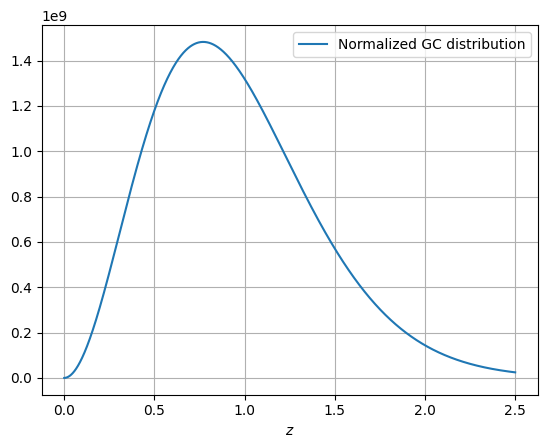

In [12]:
norm_gc, norm_gc_err = scipy.integrate.quad(n_gc,zmin,zmax)
# gal_per_sqarcmn_GC = 30
total_number_of_galaxies_euclid = 1.62*10**9
print(total_number_of_galaxies_euclid)
def n_gc_eu(redshift):
    return n_gc(redshift) * (total_number_of_galaxies_euclid/norm_gc)

total_number_of_events_gc_our_bin, total_number_of_events_gc_our_bin_err = quad(n_gc_eu,zmin,zmax)
norm_space_gc = np.linspace(zmin,zmax,10000)

number_of_events_per_bin_gc = []

for i in range(len(euclid_bin_z)-1):
    # print(euclid_bin_z[i])
    # print(euclid_bin_z[i+1])
    cnt, cnt_err = quad(n_gc_eu, euclid_bin_z[i],euclid_bin_z[i+1])
    number_of_events_per_bin_gc.append(cnt/total_number_of_events_gc_our_bin)

# print(total_number_of_galaxies_euclid)
print("Fraction for the normalized GC distribution:",number_of_events_per_bin_gc)
print('\n')
print(sum(number_of_events_per_bin_gc))

plt.plot(norm_space_gc,n_gc_eu(norm_space_gc),label = "Normalized GC distribution")
#plt.plot(norm_space_gc,norm_gc*n_gc_eu(norm_space_gc),label = "NOT Normalized GC distribution")
plt.xlabel(r'$z$')
plt.legend()
plt.grid()
#plt.xscale('log')

print('norm_gc',norm_gc )

The Poisson noise arising from the discrete number of sources of the catalog is given as $C_N^{ii} = \frac{\Omega_{fov}}{N_i}$, with $N_i$ the total number of sources within the catalog i = a, b in the considered field of view. We can assume that $\Omega_{fov} = 15000 deg^2$:

In [13]:
f_fov_gw = 1
f_fov_gc =0.3636
omega_fov_gw = 4*np.pi*f_fov_gw
omega_fov_gc = 4*np.pi*f_fov_gc

#total number of events for GW
N_gw, N_gw_err =quad(n_gw_dl,euclid_bin_d_l[0], euclid_bin_d_l[len(euclid_bin_d_l)-1])

print('The total number of events for the GW is',N_gw)

# poisson noise
#number of events per bin for GW:
number_of_events_per_bin_gw =[]

for i in range(len(euclid_bin_d_l)-1):
    cnt = quad(n_gw_dl, euclid_bin_d_l[i], euclid_bin_d_l[i+1])
    number_of_events_per_bin_gw.append(cnt[0])

print('The number of events for each chosen bin is:',number_of_events_per_bin_gw)

poisson_noise_gw = []

for i in range(len(euclid_bin_d_l)-1):
    poisson_noise_gw.append(omega_fov_gw/number_of_events_per_bin_gw[i])

print('Poisson noise for GW:', poisson_noise_gw)


#GC
#number of events per bin for GC:
number_of_events_per_bin_gc =[]

for i in range(len(euclid_bin_z)-1):
    cnt = quad(n_gc_eu, euclid_bin_z[i], euclid_bin_z[i+1])
    number_of_events_per_bin_gc.append(cnt[0])

print('The number of events for each chosen bin for GC is:',number_of_events_per_bin_gc)

poisson_noise_gc = []

for i in range(len(euclid_bin_z)-1):
    poisson_noise_gc.append(omega_fov_gc/number_of_events_per_bin_gc[i])

print('Poisson noise for GC:', poisson_noise_gc)

The total number of events for the GW is 296160.7595324497
The number of events for each chosen bin is: [7134.440668801949, 9334.850333257393, 11257.56460783362, 13337.68255247632, 15654.354525995486, 18832.57777424317, 23327.916453145648, 30327.537834134564, 44865.745113561425, 122088.08966916049]
Poisson noise for GW: [0.0017613673163350283, 0.0013461780495385984, 0.0011162601372604883, 0.0009421704681392388, 0.0008027396206909435, 0.000667267687142961, 0.0005386837971405999, 0.0004143551211801751, 0.0002800883075172817, 0.00010292871850490953]
The number of events for each chosen bin for GC is: [162852106.79208487, 162959066.73506364, 163337577.10209528, 163506888.3371587, 162066249.79761907, 162504190.77132717, 162931605.34397447, 162175827.44962895, 161961958.05141753, 155704529.63270792]
Poisson noise for GC: [2.8056943477031326e-08, 2.8038527999239343e-08, 2.797355291076117e-08, 2.794458632201008e-08, 2.8192991206291983e-08, 2.8117012451762498e-08, 2.8043253767338945e-08, 2.8173

At this point we are going to print all the parameters, which will be needed for the ````.param```` and ````.data```` files.

In [14]:
print('a is ', fitting_params[0])
print('b is ', fitting_params[1])
print('c is ', fitting_params[2])
print('d is ', fitting_params[3])
print('\n')
print("The bins chosen for EUCLID in d_L space",euclid_bin_d_l)

print("The bins chosen for EUCLID in z space",euclid_bin_z)


print('Minumum D_L:', euclid_bin_d_l[0])
print('Maximum D_L:', euclid_bin_d_l[len(euclid_bin_d_l)-1])
print('\n')
print('Total number of galaxies measured form EUCLID',total_number_of_galaxies_euclid)
# print("Fraction for the normalized GC distribution:",number_of_events_per_bin_gc)
print('\n')

print('The total number of events for the GW is',N_gw)

print('The number of events for each chosen bin is:',number_of_events_per_bin_gw)

print('Poisson noise for GW:', poisson_noise_gw)
print('\n')
print('The number of events for each chosen bin for GC is:',number_of_events_per_bin_gc)

print('Poisson noise for GC:', poisson_noise_gc)


print('norm_gc',norm_gc )

a is  4.252788956149525e-06
b is  1.9462365916353825
c is  0.0009204834426385159
d is  0.860992976674261


The bins chosen for EUCLID in d_L space [0.0, 2361.34688328694, 3348.741050455349, 4222.004178001058, 5080.9747220605595, 5971.739928975357, 6957.765441697817, 8119.204159541298, 9607.069559250918, 11903.2037583142, 20893.827527816513]
The bins chosen for EUCLID in z space [0.001, 0.418, 0.56, 0.678, 0.789, 0.9, 1.019, 1.155, 1.324, 1.576, 2.5]
Minumum D_L: 0.0
Maximum D_L: 20893.827527816513


Total number of galaxies measured form EUCLID 1620000000.0


The total number of events for the GW is 296160.7595324497
The number of events for each chosen bin is: [7134.440668801949, 9334.850333257393, 11257.56460783362, 13337.68255247632, 15654.354525995486, 18832.57777424317, 23327.916453145648, 30327.537834134564, 44865.745113561425, 122088.08966916049]
Poisson noise for GW: [0.0017613673163350283, 0.0013461780495385984, 0.0011162601372604883, 0.0009421704681392388, 0.00080273962069094